In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sk

In [2]:
house=pd.read_csv(".\Datasets\Boston_housing.csv")
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
house.shape

(506, 14)

In [4]:
house=pd.DataFrame(house)

In [5]:
house.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\ljire\AppData\Local\Temp\ipykernel_14160\3885517229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['medv'], bins=30)


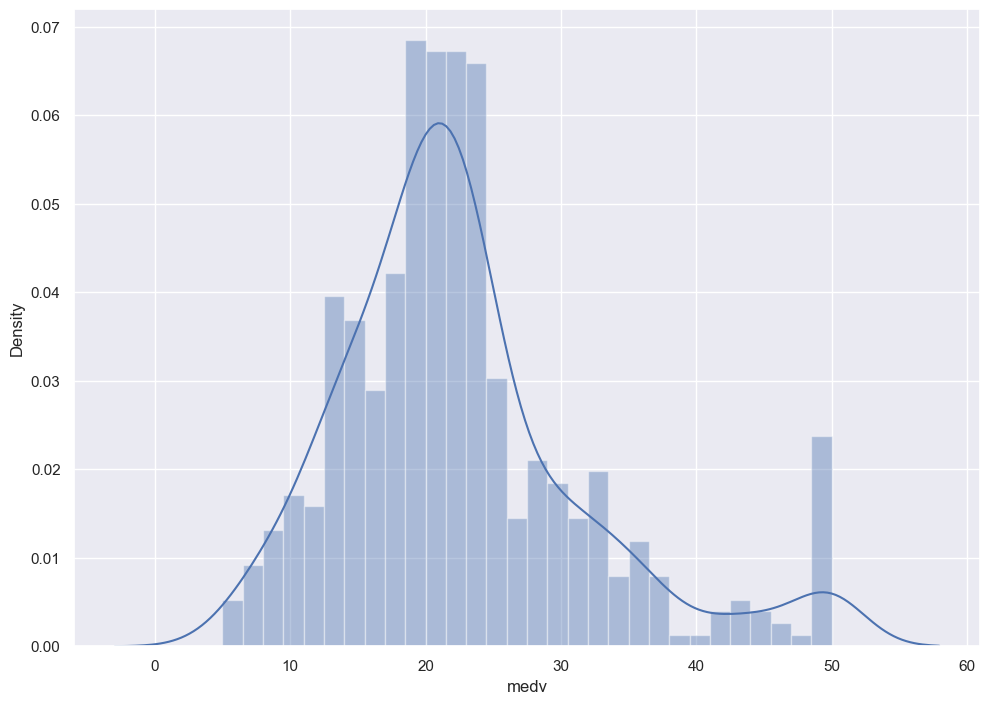

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(house['medv'], bins=30)
plt.show()

In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<Axes: >

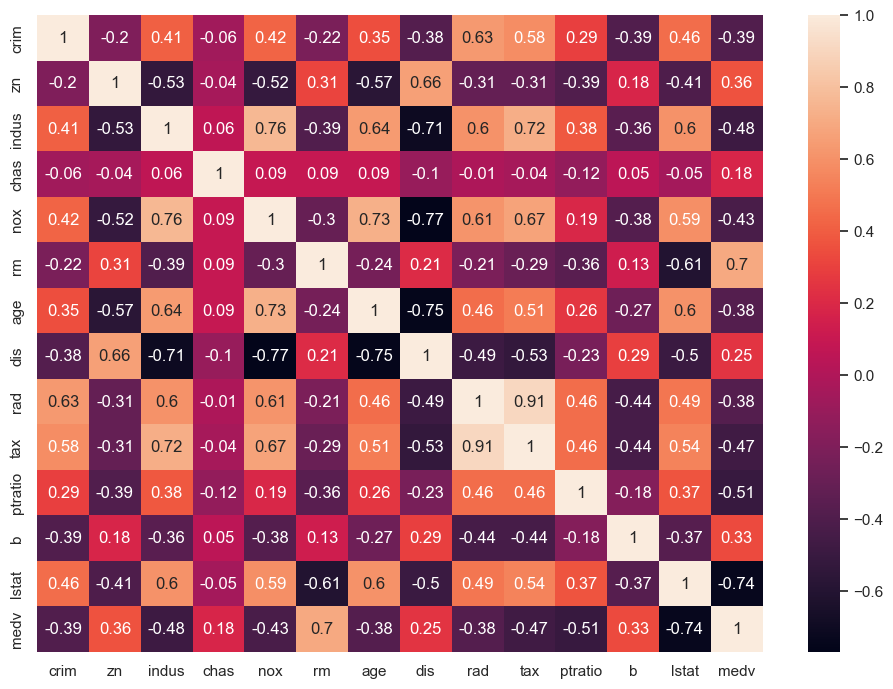

In [9]:
correlation_matrix = house.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

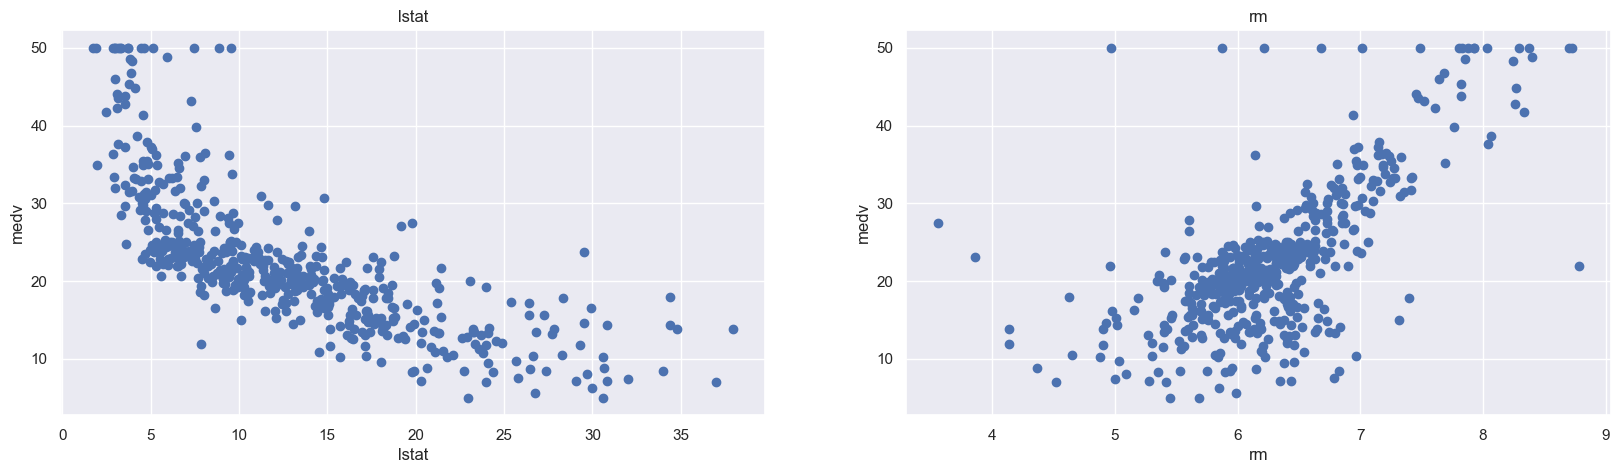

In [10]:
plt.figure(figsize=(20, 5))

features = ['lstat','rm']
target = house['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = house[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [11]:
X = pd.DataFrame(np.c_[house['lstat'],house['rm']], columns = ['lstat','rm'])
Y = house['medv']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
L1 = lin_model.score(X_train, Y_train)
L2 = lin_model.score(X_test, Y_test)
print("R² of linear Regressor  for two important feature on training set: {:.3f}".format(L1))
print("R² of linerar Regressor   for two important feature on test set: {:.3f}".format(L2))

R² of linear Regressor  for two important feature on training set: 0.630
R² of linerar Regressor   for two important feature on test set: 0.663


# Now make the train and test set for all feature of the dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house.loc[:, house.columns != 'medv'], house['medv'], random_state=66)

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print("R² of Linear Regression on training set: {:.3f}".format(l1))
print("R² of Linear Regression on test set: {:.3f}".format(l2))

R² of Linear Regression on training set: 0.713
R² of Linear Regression on test set: 0.817


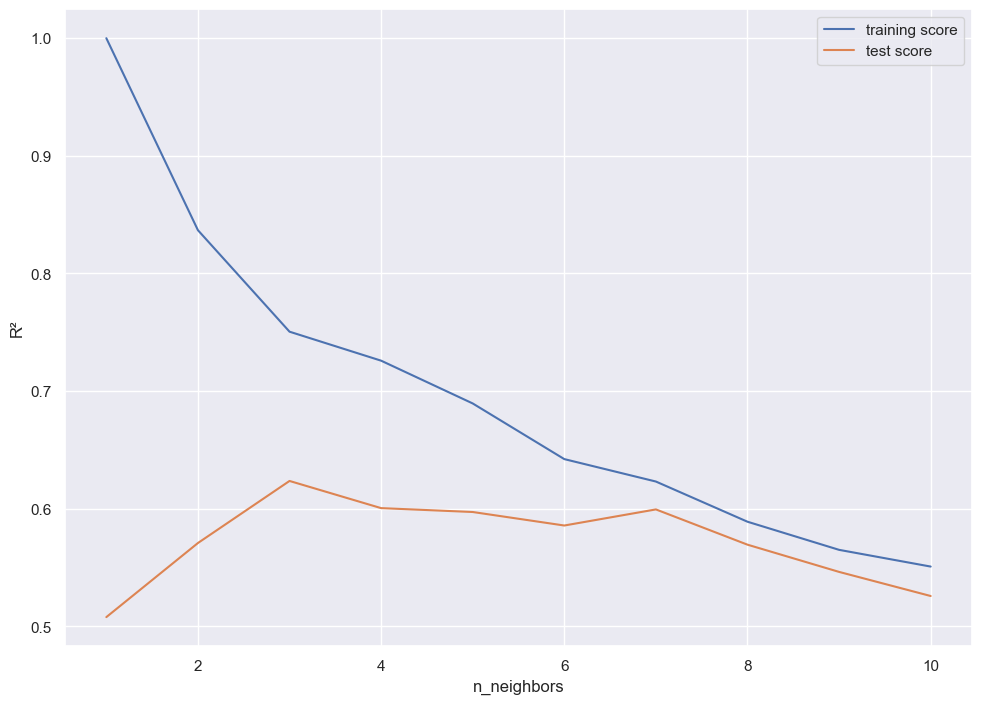

In [16]:
from sklearn.neighbors import KNeighborsRegressor
training_score = []
test_score = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 knn = KNeighborsRegressor(n_neighbors=n_neighbors)
 knn.fit(X_train, y_train)
 # record training set score
 training_score.append(knn.score(X_train, y_train))
 # record test set score
 test_score.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel('R²')
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
k1 = knn.score(X_train, y_train)
k2 = knn.score(X_test, y_test)
print("R² of Linear Regression on training set: {:.3f}".format(k1))
print("R² of Linear Regression on test set: {:.3f}".format(k2))

R² of Linear Regression on training set: 0.623
R² of Linear Regression on test set: 0.599


In [18]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3,random_state=0)
tree.fit(X_train, y_train)
t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t2))

R² of Decision Tree Regressor on training set: 0.815
R² of Decision Tree Regressor on test set: 0.826


In [21]:
housing_features = [x for i,x in enumerate(house.columns) if i!=13]

In [22]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.03083446 0.         0.         0.         0.         0.28428973
 0.         0.06842908 0.         0.         0.         0.
 0.61644672]


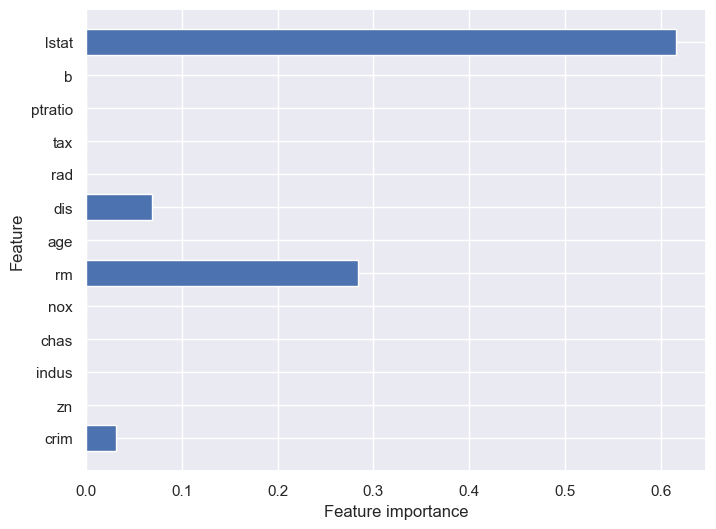

In [23]:
def plot_feature_importances_housing(model):
 plt.figure(figsize=(8,6))
 n_features = 13
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), housing_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances_housing(tree)
plt.savefig('feature_importance')

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r1))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r2))

R² of Random Forest Regressor on training set: 0.979
R² of Random Forest Regressor on test set: 0.895


In [30]:
rf1 = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
r3 = rf1.score(X_train, y_train)
r4 = rf1.score(X_test, y_test)
print("R² of Random Forest Regressor on training set: {:.3f}".format(r3))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r4))

R² of Random Forest Regressor on training set: 0.934
R² of Random Forest Regressor on test set: 0.888


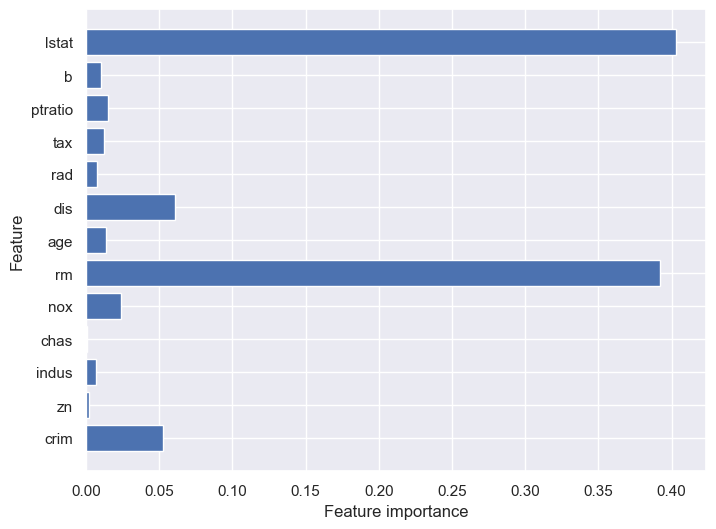

In [31]:
plot_feature_importances_housing(rf)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
g1 = gb.score(X_train, y_train)
g2 = gb.score(X_test, y_test)
print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 0.977
R^2 of Gradient Boosting Regressor on test set: 0.926


In [33]:
gb1 = GradientBoostingRegressor(random_state=0, max_depth=4)
gb1.fit(X_train, y_train)
g3 = gb1.score(X_train, y_train)
g4 = gb1.score(X_test, y_test)
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

R² of Gradient Boosting Regressor on training set: 0.992
R² of Gradient Boosting Regressor on test set: 0.920


In [34]:
gb2 = GradientBoostingRegressor(random_state=0, learning_rate=0.15)
gb2.fit(X_train, y_train)
g5 = gb2.score(X_train, y_train)
g6 = gb2.score(X_test, y_test)
print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g5))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g6))

R² of Gradient Boosting Regressor on training set: 0.987
R² of Gradient Boosting Regressor on test set: 0.929


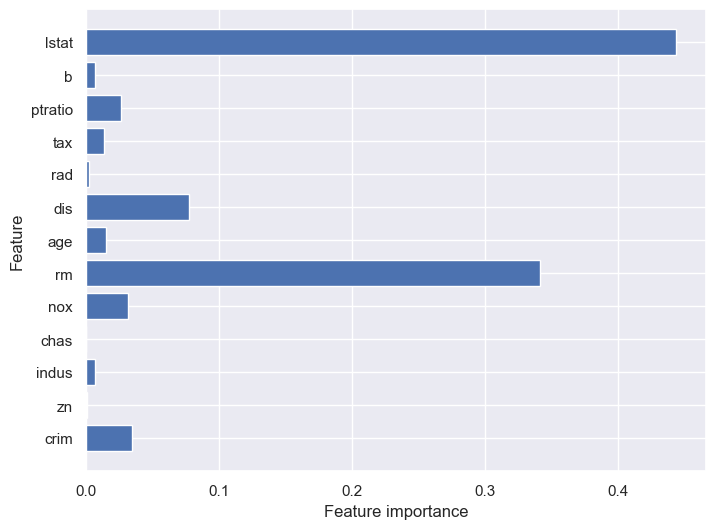

In [35]:
plot_feature_importances_housing(gb1)


In [36]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
s1 = svr.score(X_train, y_train)
s2 = svr.score(X_test, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s1))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s2))

R² of Support Vector Regressor on training set: 0.193
R² of Support Vector Regressor on test set: 0.248


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svr1 = SVR()
svr1.fit(X_train_scaled, y_train)
s3 = svr1.score(X_train_scaled, y_train)
s4 = svr1.score(X_test_scaled, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s3))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s4))

R² of Support Vector Regressor on training set: 0.586
R² of Support Vector Regressor on test set: 0.670


In [38]:
svr2 = SVR(gamma=10)
svr2.fit(X_train_scaled, y_train)
s5 = svr2.score(X_train_scaled, y_train)
s6 = svr2.score(X_test_scaled, y_test)
print("R² of Support Vector Regressor on training set: {:.3f}".format(s5))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s6))

R² of Support Vector Regressor on training set: 0.443
R² of Support Vector Regressor on test set: 0.331


In [39]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
m1 = mlp.score(X_train, y_train)
m2 = mlp.score(X_test, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m1))
print("R² of MLP Regressor on test set: {:.3f}".format(m2))

R² of MLP Regressor on training set: 0.652
R² of MLP Regressor on test set: 0.687


C:\Users\ljire\anaconda3\envs\zihad\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=0)
mlp1.fit(X_train_scaled, y_train)
m3 = mlp1.score(X_train_scaled, y_train)
m4 = mlp1.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m3))
print("R² of MLP Regressor on test set: {:.3f}".format(m4))

R² of MLP Regressor on training set: 0.667
R² of MLP Regressor on test set: 0.740


C:\Users\ljire\anaconda3\envs\zihad\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
mlp2 = MLPRegressor(max_iter=1000, random_state=0)
mlp2.fit(X_train_scaled, y_train)
m5 = mlp2.score(X_train_scaled, y_train)
m6 = mlp2.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m5))
print("R² of MLP Regressor on test set: {:.3f}".format(m6))

R² of MLP Regressor on training set: 0.908
R² of MLP Regressor on test set: 0.901


C:\Users\ljire\anaconda3\envs\zihad\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
mlp3 = MLPRegressor(max_iter=1000, alpha=1, random_state=0)
mlp3.fit(X_train_scaled, y_train)
m7 = mlp3.score(X_train_scaled, y_train)
m8 = mlp3.score(X_test_scaled, y_test)
print("R² of MLP Regressor on training set: {:.3f}".format(m7))
print("R² of MLP Regressor on test set: {:.3f}".format(m8))

R² of MLP Regressor on training set: 0.907
R² of MLP Regressor on test set: 0.902


C:\Users\ljire\anaconda3\envs\zihad\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
models = ['KNN Regressor', 'Linear Regression two feature', 'Linear Regression', 'Decision Tree Regressor' ,'Random Forest Regressor',
 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor']
tests_score = [k2,L2, l2, t2, r2, g4, s6, m8]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
5,Gradient Boosting Regressor,0.920395
7,MLP Regressor,0.902261
4,Random Forest Regressor,0.894637
3,Decision Tree Regressor,0.826184
2,Linear Regression,0.817170
1,Linear Regression two feature,0.662900
0,KNN Regressor,0.599429
6,Support Vector Regressor,0.331360


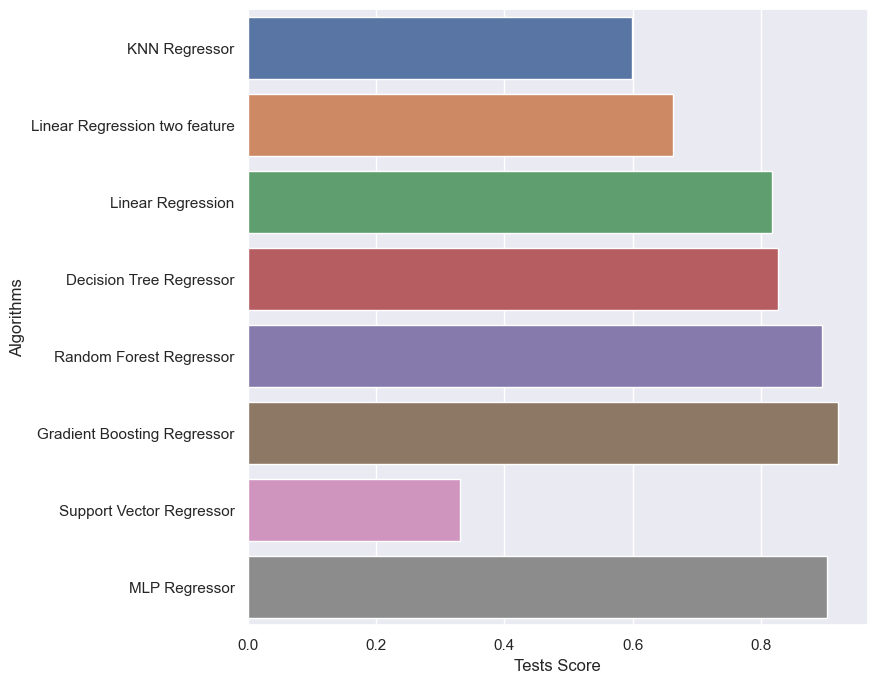

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Score", y = "Algorithms", data = compare_models)
plt.show()